# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

**Answer:** Since there are only two compartments, and since nobody dies, we only need two equations.


$$\frac{dS}{dt} = -\beta SI + \gamma I$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

The first equation describes the rate of how many that susceptible to the disease at any given time. It is the ones that are not infectious. Since people become susceptible once they have "recovered" we need to include the recovered in the first equation.
The secound equation describes the rate of how many are infectious at any given monent. It is the people whom has gotten infected minus the ones that have recovered.
The infectious rate, $\beta$ describes the probability of an infected person passing on the disease, which both reflects the number of contacts the person has and the how contagious the disease is. The recovery rate, $\gamma$ describes how fast people recover from the disease

What will happens depends not on how big or how small gamma or beta is, but rather how big they are compared to each other.
If $\gamma$ > $\beta$ then people will recover faster than they get infected, which leads to the disease eventually dying out.
If $\gamma$ < $\beta$ then the fraction of infected will reach a constant level, predicted by the ratio between $\gamma$ and $\beta$. This is called an endemic state.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

**Answer:**


$$\frac{dS}{dt} = -\beta SI + \epsilon R$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} =  \gamma I - \epsilon R$$

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

**Answer**:

Since the simulation is random, the result differs everytime it is run. I run it five times and see if the average is around 10 I decide that it is close enough. Since 5 times is a very small sample, the percentage I find is not the true value.


1. In the BA network, with strategy A we would need to vaccine around 75% to get around 10 infected individual. With strategy B it is around 15 % and with stategy C it is around 50 %.
2. The reason that strategy C is more effective than strategy A is because of the friendsship paradox. Your friends are more successful and have more friends than you do (and thereby more connections). In more formal terms, the mean degree of a neighbour node is higher than the average node. So by first choosing random and then randomly choosing one of their connections, we (on average) gets nodes with higher degrees.
3. The BA network has a greater variation in node degree. This means that in the BA network the difference is bigger between the randomely chosen nodes mean degree and the mean degree of the neighbor nodes than in the ER network. We gain more by moving to a random neighbor in the BA network than in the ER network.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

**Answer:** I have chosen the Explorable #2, which is a simulation of the SIRS Model (Susceptible-Infectious-Recovered-Susceptible Model).

This model is good for modelling disease where you have a immunity for a while after being infectious. This could model the common cold or influenza, since these diseases mutate constantly meaning that immunity wane after a while.

In this model there is no death, hence nobody leaves the model and the population is therefore constant. The recovered becomes susceptible again. The SIRS model can be seen as a special case of the SI-model, where the infectious that recover goes to the "recover bin" before returning to the "susceptible bin". The SIRS model has two different outcomes:
- Endemic state
- Disease-free state

The outcome (and speed) of the model depends on the relationsship between the parameters of the mode. The parameters being: infection rate ($\beta$), recovery rate ($\gamma$), imunity waning rate ($\epsilon$) and migration rate ($\zeta$). 


A wierd example: The Long Summer Vacation: Sober-Drinking-Hungover-Sober model.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

**Answer to Q1:** Commenting the code

In [63]:
G = nx.connected_caveman_graph(10, 5) #Creates an undirected graph with 10 cliques with 5 members in each clique.
# _ = nw.visualize(G) # Uncomment if you want to have a look at the network

p_I = 0.1 # Set the probability of transmission
n_iter = 200 #Number of iterations

I = set() #The infectious nodes, initially nobody is in this node
S = set(G.nodes()) #The susceptible nodes, initially everybody is susceptible

patient0 = np.random.choice(list(S)) #Choosing a random node in the susceptible node as patient 0, in order to start the 'epedemic'

#Moves patient 0 (which is now infectious) from the list of susceptibles, to the list of infectious.
I.add(patient0)
S.remove(patient0)

#Models the evolution in the model.
for t in range(n_iter): # The times that the simulation is run, this can be viewed as time. Initially run for 200 timeperiods.
    #In each timeperiode n_iter[0,200] we take each infectious node in the list of infectious:
    for infected_node in list(I):
        #We set neighbors to be all the neighbors for the infected node (no matter whether they are infectious or susceptible)
        neighbors = G.neighbors(infected_node)
        #We find out how many nodes get infected in the timeperiod t.
        #We take each neighbor of an infected node and draws a random number for it (random.random).
        #If the random number is below the probability of transmission (p_I), then the neighbor gets infected
        #And is added to the list of intected neighbors
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        #Adding the infected_neigbors to the list of the infected
        I |= infected_neighbors
        #removing the infected_neigbors from the list of susceptible
        S -= infected_neighbors
        
#Note that there is no recovery in the model, so eventually everybody gets infected

**Answer to Q2:** Adapting the code and make a plot of the fraction of infected over time 

In [64]:
#Creating a new G
del G
G = nx.connected_caveman_graph(10, 5)

#Modyfying the model to be able to create a plot of the infected rate over time.

p_I = 0.1 # Set the probability of transmission
n_iter = 200 #Number of iterations

I = set() #The infectious nodes, initially nobody is in this node
S = set(G.nodes()) #The susceptible nodes, initially everybody is susceptible

patient0 = np.random.choice(list(S)) #Choosing a random node in the susceptible node as patient 0, in order to start the 'epedemic'

#Moves patient 0 (which is now infectious) from the list of susceptibles, to the list of infectious.
I.add(patient0)
S.remove(patient0)

frac_t=[]

#Models the evolution in the model.
for t in range(n_iter): 
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors
        S -= infected_neighbors
    frac = len(I)/50
    frac_t.append(frac)
        
        
#Note that there is no recovery in the model, so eventually everybody gets infected.

Text(0, 0.5, 'Infected fraction')

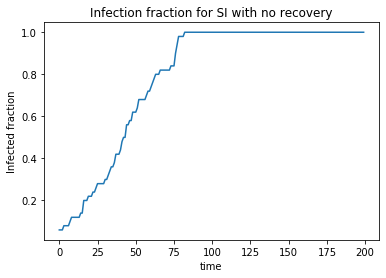

In [66]:
plt.plot(frac_t)
plt.title('Infection fraction for SI with no recovery')
plt.xlabel('time')
plt.ylabel('Infected fraction')

**Answer to Q3:** Editing the code, such that some of the infected nodes becomes susceptible to infection again. In other word: They recover.

In [391]:
#Creating a new G
del G
G = nx.connected_caveman_graph(10, 5)

#Modyfying the model to be able to create a plot of the infected rate over time.

p_I = 0.1 # Set the probability of transmission
n_iter = 1000 #Number of iterations
T_I = 10 # After 10 timesteps the infected gets susceptible again

I = set() #The infectious nodes, initially nobody is in this node
S = set(G.nodes()) #The susceptible nodes, initially everybody is susceptible

patient0 = np.random.choice(list(S)) #Choosing a random node in the susceptible node as patient 0, in order to start the 'epedemic'

#Moves patient 0 (which is now infectious) from the list of susceptibles, to the list of infectious.
I.add(patient0)
S.remove(patient0)

first = []
time_of_inf = []
pat0_t = [-1]
pat0_n = [patient0]
pat0 = list(zip(pat0_n, pat0_t))
time_of_inf.extend(pat0)

frac_t=[]


#Models the evolution in the modsel.
for t in range(n_iter):
    #print('loop',t)
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        first_inf = list(infected_neighbors - I)
        for first_inf in first_inf:
            first_t = [t]
            first_inf2 = [first_inf]
            first = list(zip(first_inf2, first_t))
            time_of_inf.extend(first)
        I |= infected_neighbors
        S -= infected_neighbors
    #removing the recovered
    for x in time_of_inf:
        end_t = x[1]+T_I
        if t==end_t:
            new_sus=x[0]
            I.remove(new_sus)
            S.add(new_sus)
    frac = len(I)/50
    frac_t.append(frac)

Text(0, 0.5, 'Infected fraction')

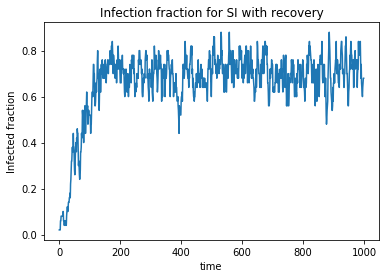

In [392]:
# I have made 1000 iterations instread of 200
# What we see is that the model hits an endemic state, which seems to be a state where around 70 % of the population is infected.
plt.plot(frac_t)
plt.title('Infection fraction for SI with recovery')
plt.xlabel('time')
plt.ylabel('Infected fraction')

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [469]:
#Getting facebook data
import pandas as pd

data = pd.read_csv(
    "facebook-wall.txt.gz",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)
t0 = data.timestamp.max() - 86400 * 14  # Lower bound of time-slice (here: 25 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.Graph` from this dataframe
G = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.Graph)

In [470]:
#Modyfying the model to be able to create a plot of the infected rate over time.

p_I = 0.1 # Set the probability of transmission
n_iter = 200 #Number of iterations
T_I = 10 # After 10 timesteps the infected nodes move to the recoved bin
T_R = 20 # After 20 timesteps, the immunity wane and the node becomes susceptible again

R = set() # The recovered nodes, initially nobody is in this node
I = set() #The infectious nodes, initially nobody is in this node
S = set(G.nodes()) #The susceptible nodes, initially everybody is susceptible
pop = len(S)

patient0 = np.random.choice(list(S)) #Choosing a random node in the susceptible node as patient 0, in order to start the 'epedemic'

#Moves patient 0 (which is now infectious) from the list of susceptibles, to the list of infectious.
I.add(patient0)
S.remove(patient0)

first = []
time_of_inf = []
pat0_t = [-1]
pat0_n = [patient0]
pat0 = list(zip(pat0_n, pat0_t))
time_of_inf.extend(pat0)


frac_S_t=[]
frac_I_t=[]
frac_R_t=[]


#Models the evolution in the modsel.
for t in range(n_iter):
    #print('loop',t)
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        first_inf = list(infected_neighbors - I)
        for first_inf in first_inf:
            first_t = [t]
            first_inf2 = [first_inf]
            first = list(zip(first_inf2, first_t))
            time_of_inf.extend(first)
        I |= infected_neighbors
        S -= infected_neighbors
    #removing the recovered
    for x in time_of_inf:
        end_I = x[1]+T_I
        end_R = x[1]+T_R
        if t==end_I:
            new_rec=x[0]
            I.remove(new_rec)
            R.add(new_rec)
        if t==end_R:
            new_sus=x[0]
            R.remove(new_sus)
            S.add(new_sus)
    frac_S = len(S)/pop
    frac_S_t.append(frac_S)
    frac_I = len(I)/pop
    frac_I_t.append(frac_I)
    frac_R = len(R)/pop
    frac_R_t.append(frac_R)

Text(0.5, 1.0, 'Fraction of Recovered')

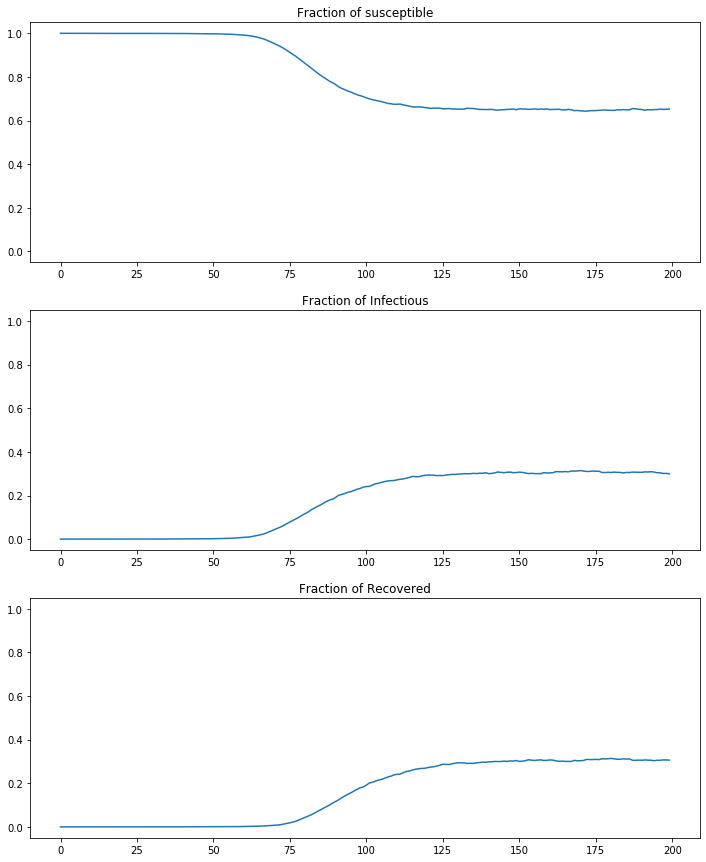

In [471]:
# Three subplots sharing both x/y axes

f, (ax1, ax2, ax3) = plt.subplots(3,1, sharey=True,figsize=(12,15))
ax1.plot(frac_S_t)
ax1.set_title('Fraction of susceptible')
ax2.plot(frac_I_t)
ax2.set_title('Fraction of Infectious')
ax3.plot(frac_R_t)
ax3.set_title('Fraction of Recovered')


### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.